In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tifffile 
import nd2
from stardist import random_label_cmap
cmap = random_label_cmap()

In [8]:
masks =  (np.array(Image.open("../microcolony_analysis/real_data/100x_SB5_dilute002_segmented/002.png")))
image = nd2.imread("../microcolony_analysis/real_data/agar_pads/100x_SB5_dilute002.nd2")

In [10]:
image.shape

(183, 2, 2304, 2304)

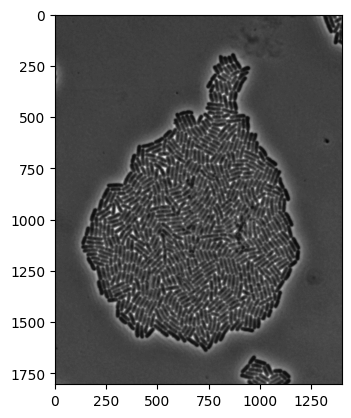

In [13]:
plt.imshow(image[2,0][500:,599:2000],cmap="Greys_r")

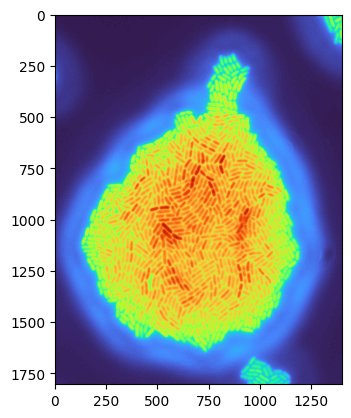

In [15]:
plt.imshow(image[2,1][500:,599:2000],cmap="turbo")

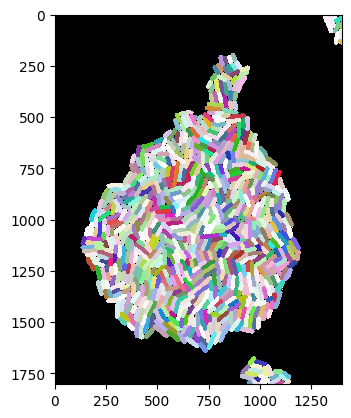

In [7]:
plt.imshow(masks[500:,599:2000], interpolation="none", cmap=cmap)

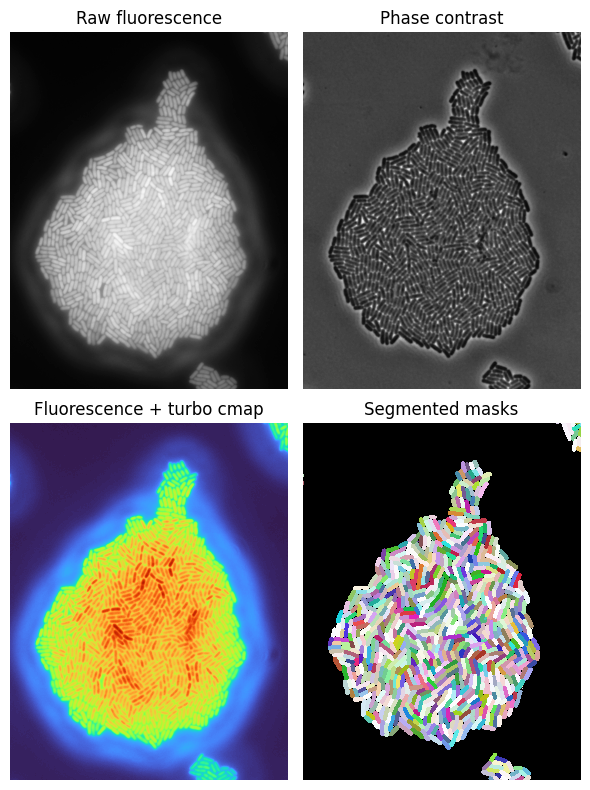

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(6,8))
axs[0,1].imshow(image[2,0][500:,599:2000],cmap="Greys_r")
axs[0,1].set_title("Phase contrast")
axs[0,0].imshow(image[2,1][500:,599:2000],cmap="Greys_r")
axs[0,0].set_title("Raw fluorescence") 
axs[1,0].imshow(image[2,1][500:,599:2000],cmap="turbo")
axs[1,0].set_title("Fluorescence + turbo cmap")
axs[1,1].imshow(masks[500:,599:2000], interpolation="none", cmap=cmap)
axs[1,1].set_title("Segmented masks")
for ax in axs.flatten():
    ax.set_axis_off()
plt.tight_layout()
plt.savefig("segmentation.png",dpi=300)